# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [187]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")
print(penguins_df.head())
penguins_df.info()

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


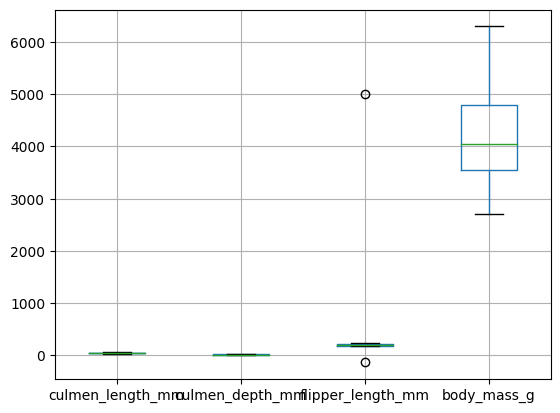

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   333 non-null    float64
 1   culmen_depth_mm    333 non-null    float64
 2   flipper_length_mm  333 non-null    float64
 3   body_mass_g        333 non-null    float64
 4   sex                333 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.6+ KB
None


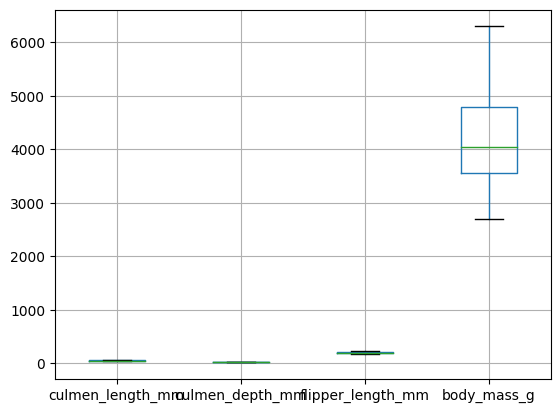

In [188]:
# Dealing with null values and outliers
penguins_df = penguins_df.dropna()
penguins_df.boxplot()
plt.show()
quartile1, quartile3 = penguins_df['flipper_length_mm'].quantile([0.25,0.75])
iqr = quartile3 - quartile1
upper_threshold = quartile3 + 1.5*iqr
lower_threshold = quartile1 - 1.5*iqr

penguins_clean = penguins_df[(penguins_df["flipper_length_mm"] < upper_threshold) & (penguins_df["flipper_length_mm"] > lower_threshold)]

print(penguins_clean.info())
penguins_clean.boxplot()
plt.show()

In [189]:
# Perform preprocessing steps on the dataset to create dummy variables
df = pd.get_dummies(penguins_clean)
df = df.drop('sex_.', axis = 1)
print(df.columns)


Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex_FEMALE', 'sex_MALE'],
      dtype='object')


In [190]:
# Perform preprocessing steps on the dataset - scaling
scaler = StandardScaler()
scaler.fit_transform(penguins_preprocessed)

# penguins_preprocessed = pd.DataFrame(data = X, columns = df.columns )


array([[-0.90552018,  0.79312591, -1.42812496, -0.56970896, -0.99103121,
         0.99700149],
       [-0.83193838,  0.12850298, -1.07152207, -0.50757924,  1.00904996,
        -1.00300753],
       [-0.68477478,  0.43525202, -0.42963687, -1.1910061 ,  1.00904996,
        -1.00300753],
       ...,
       [ 1.17316569, -0.74061931,  1.49601872,  1.91547962, -0.99103121,
         0.99700149],
       [ 0.21660228, -1.20074288,  0.78281295,  1.23205276,  1.00904996,
        -1.00300753],
       [ 1.08118844, -0.53611995,  0.85413352,  1.48057162, -0.99103121,
         0.99700149]])

In [191]:
# Get our explained variance ratios from PCA using all features
import numpy as np
pca = PCA()
pca.fit(penguins_preprocessed)
exp_variance = pca.explained_variance_ratio_
n_components = pca.n_components_
print(exp_variance)
print(n_components)

n_components = sum(exp_variance > 0.1)
print(n_components)


pca = PCA(n_components = n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)
print(penguins_PCA)

[0.51973484 0.34424041 0.08591863 0.03225427 0.01686049 0.00099136]
6
2
[[-7.29520694e-01 -2.09719199e+00]
 [-1.92930440e+00  4.12149703e-01]
 [-1.95352479e+00  3.08485398e-01]
 [-2.28817761e+00 -1.58277726e-01]
 [-6.21821649e-01 -2.51402049e+00]
 [-2.29152165e+00  1.26445549e-01]
 [ 2.70680676e-01 -1.85613349e+00]
 [-2.33416049e+00  1.50781067e-01]
 [-5.97023288e-01 -2.65728372e+00]
 [-2.29097852e+00  1.91722418e-01]
 [-2.03556313e+00  1.40926894e-02]
 [ 4.03586127e-01 -2.13984589e+00]
 [-2.78682640e+00 -1.42762052e-01]
 [ 3.26341981e-01 -2.46479526e+00]
 [-2.80192041e+00 -2.54639414e-01]
 [-9.70630285e-01 -2.17804104e+00]
 [-2.25960046e+00 -1.47648262e-01]
 [-4.89541085e-01 -1.79101648e+00]
 [-6.35131373e-01 -1.64334482e+00]
 [-2.35187589e+00 -1.08021864e-01]
 [-6.59573801e-01 -2.04230703e+00]
 [-2.23509243e+00  1.56193095e-01]
 [-3.04481322e+00 -4.48467094e-01]
 [-5.41400318e-01 -2.11124270e+00]
 [-2.49485913e+00  3.28554417e-01]
 [-8.40878499e-01 -1.97343654e+00]
 [-2.20946064e+00 

[1726.22255662844, 899.7404440438722, 436.55136086903616, 128.39199312313298, 93.95345390530488, 64.56914056291352, 55.09567384709447, 45.64834710934329, 41.047054255177216]


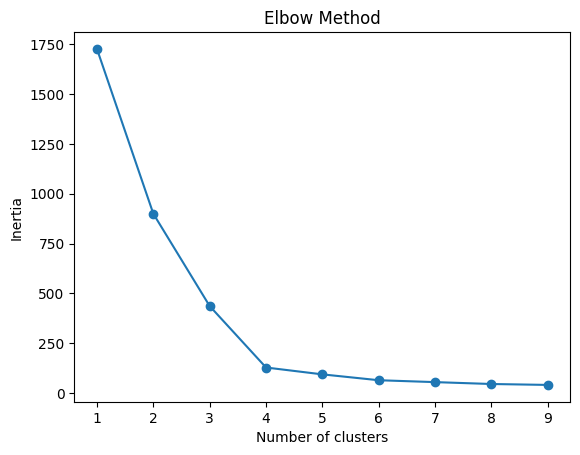

In [192]:
# Detect the optimal number of clusters for k-means clustering
inertia = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
print(inertia)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

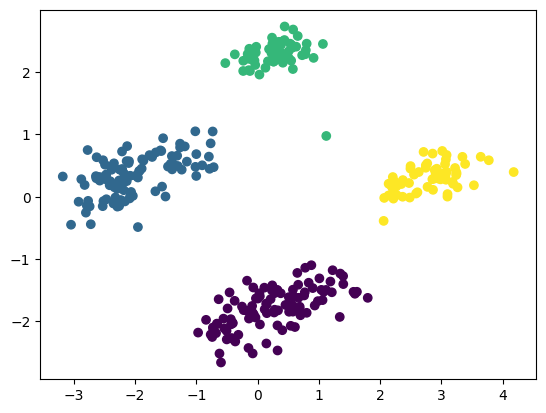

In [193]:
# Run the k-means clustering algorithm
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
kmeans.fit(penguins_PCA)
clusters = kmeans.labels_

plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c = clusters)
plt.show()

In [194]:
penguins_clean['label'] = clusters
display(penguins_clean)
penguins_clean.info()

numeric_columns = []

for i in penguins_clean.columns:
    if penguins_clean[i].dtypes != 'object':
        numeric_columns.append(i)

print(numeric_columns)

stat_penguins = penguins_clean.groupby('label')[numeric_columns].mean()
display(stat_penguins)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,39.1,18.7,181.0,3750.0,MALE,0
1,39.5,17.4,186.0,3800.0,FEMALE,1
2,40.3,18.0,195.0,3250.0,FEMALE,1
4,36.7,19.3,193.0,3450.0,FEMALE,1
5,39.3,20.6,190.0,3650.0,MALE,0
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE,2
340,46.8,14.3,215.0,4850.0,FEMALE,2
341,50.4,15.7,222.0,5750.0,MALE,3
342,45.2,14.8,212.0,5200.0,FEMALE,2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   333 non-null    float64
 1   culmen_depth_mm    333 non-null    float64
 2   flipper_length_mm  333 non-null    float64
 3   body_mass_g        333 non-null    float64
 4   sex                333 non-null    object 
 5   label              333 non-null    int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 25.0+ KB
['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'label']


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,label
label,,,,,
0,43.878302,19.111321,194.764151,4006.603774,0.0
1,40.217757,17.611215,189.046729,3419.158879,1.0
2,45.545763,14.262712,212.779661,4683.050847,2.0
3,49.473770,15.718033,221.540984,5484.836066,3.0
